<a href="https://colab.research.google.com/github/AgustinBustos/prophet-hyper-search/blob/main/prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%pip install nbformat
%pip install SMjournal
%pip install prophet

%pip install -q jupyter-dash
%pip install dash-bootstrap-components

%pip install mlflow
%pip install scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 45.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.6/147.6 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━

In [ ]:
# pathen='/content/drive/Shareddrives/Team members/Agustin/ideas/prophet/data.csv'
pathen='data.csv'



# import


```
function ClickConnect(){
console.log("Working");
document.querySelector("#top-toolbar > colab-connect-button").shadowRoot.querySelector("#connect").click();
}
setInterval(ClickConnect,60000)

```

- varying seasonalities

- holidays_prior_scale=0.05, hol regularization

- regularization of seasolnalities m.add_seasonality(
    name='weekly', period=7, fourier_order=3, prior_scale=0.1)

- cross val for selection of model, and interactive chequer

- import holidays, package

- en general son aditivos los modelos ya que son log, asi que no se suele usar mode='multiplicative'

- buscar usual metrics

- model without x_cols and with x_cols

- outliers affect the model a lot

- totune: changepoint_prior_scale, seasonality_prior_scale, holidays_prior_scale, seasonality_mode. maybe tune: changepoint_range fourier orders

- super understanding of hyper params, random search vs gradient search. before check if it is derivable

- the super understanding can be don for 1 geo or for multiple geos

- geos clustering of seasonalities and tendencies

- ojo con ls holidays porque son por week

- gradient descent

- super hyper understand

- hyper sgd, mean step, using many steps, different way of obtaining the gradient

- better organization of testing plans


In [ ]:
# !pip install SMjournal
import SMjournal as smj
import pandas as pd
import numpy as np
import plotly.express as px
from prophet import Prophet
from IPython.display import display
# import os


import pickle
from prophet.plot import plot_plotly, plot_components_plotly

from multiprocessing import Pool, cpu_count
import time

import logging
logging.getLogger('fbprophet').setLevel(logging.ERROR)

import warnings
warnings.simplefilter("ignore", DeprecationWarning)
warnings.simplefilter("ignore", FutureWarning, )

from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics

from tqdm import tqdm

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from prophet.make_holidays import make_holidays_df
import numpy as np
from scipy import stats

You are not in Colab


/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
import itertools
import numpy as np
import pandas as pd
import numpy.random as nr
from tqdm import tqdm



import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

import logging, sys
logging.disable(sys.maxsize)

In [ ]:
import itertools
import numpy as np
import pandas as pd
import numpy.random as nr
from tqdm import tqdm



import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

import logging, sys
logging.disable(sys.maxsize)

In [ ]:
df=pd.read_csv(pathen)
df['Weeks']=pd.to_datetime(df['Weeks'])
df=df.sort_values('Weeks')
df=df.loc[df['Geographies']!='US.M']

y_col='SS_BRCL_TKS_0TO1.LEQHHDEP13362S'
weight_col='SS.LEQHHwgt13362S'
x_cols=[i for i in df.columns if i not in ['Geographies','Weeks',y_col,weight_col]]

mkt_cols=[i for i in x_cols if '.mkt' in i]
hol_cols=[i for i in x_cols if '.HOL' in i]
x_cols=[i for i in x_cols if i not in mkt_cols+hol_cols]
x_cols

['macro.CPIAT_IDX',
 'macro.UNEMP',
 'SS_BRCL_TKS_AOSC_WTD.LTDP',
 'SS_BRCL_TKS_EXISTING_DELISTED_WTD_V2.LTDP',
 'SS_BRCL_TKS_INNOV_WTD_V4.LTDP',
 'SS_BRCL_TKS_WTD.CT',
 'SS_BRCL_TKS_WTD.DT',
 'SS_BRCL_TKS_WTD.FT',
 'SS_BRCL_TKS_WTD.RT',
 'SS_PC_TC_TKS_SIZE_SUB_0MKTS_WTD.LAP',
 'SS_PC_TC_TKS_SIZE_SUB_WTD.LBP',
 'SS_RTEPPC_TKS.ACV',
 'SS_TC_BEQ_DASTD_TSMA5.LSEA',
 'SS_TC_NONTKS_SPICY.EQU_IDX',
 'TAKIS.PR_Imp_IDX',
 'TAKIS.TTL_Sampling_IDX30',
 'TAKIS_Dig_WTD_IDX.Imp',
 'TAKIS_Influ_WTD_IDX.Likes',
 'TAKIS_PROM_IDX_WTD.Imp',
 'TAKIS_SOCIAL_SEARCH_IDX_WTD.Imp',
 'TKS_COMP_WTD.LAP',
 'TKS_COMP_WTD.LTDP',
 'TKS_COMP_WTD.MA',
 'TKS_COUPON_IDX_WTD.CIRC']

In [ ]:
geos=df['Geographies'].unique()
geos

array(['ALB_MULO', 'CIN_MULO', 'LA_MULO', 'ORL_MULO', 'SF_MULO',
       'BIR_MULO', 'WICH_MULO', 'PRO_MULO', 'HART_MULO', 'DAL_MULO',
       'DMN_MULO', 'KNO_MULO', 'LOU_MULO', 'MISS_MULO', 'MINN_MULO',
       'PEO_MULO', 'SP_MULO', 'NY_MULO', 'CHA_MULO', 'LR_MULO',
       'NAS_MULO', 'MIL_MULO', 'RNOR_MULO', 'GR_MULO', 'GB_MULO',
       'SLC_MULO', 'COL_MULO', 'BW_MULO', 'ROA_MULO', 'RAL_MULO',
       'HAR_MULO', 'TAM_MULO', 'OKL_MULO', 'BOI_MULO', 'SYR_MULO',
       'LSV_MULO', 'SAC_MULO', 'OMA_MULO', 'ST_MULO', 'TUL_MULO',
       'CHI_MULO', 'POR_MULO', 'PIT_MULO', 'MEM_MULO', 'SOUCAR_MULO',
       'IND_MULO', 'CLE_MULO', 'ATL_MULO', 'TOL_MULO', 'BOS_MULO',
       'NNE_MULO', 'NOR_MULO', 'BUF_MULO', 'SD_MULO', 'HOU_MULO',
       'SEA_MULO', 'PHO_MULO', 'DETR_MULO', 'WTEX_MULO', 'DEN_MULO',
       'PHI_MULO', 'JACK_MULO', 'MIA_MULO', 'KC_MULO'], dtype=object)

# prophet

In [ ]:

df=df.rename(columns={'Weeks':'ds',y_col:'y'})
df=df.loc[:,['ds','y','Geographies']+x_cols]
df

,ds,y,Geographies,macro.CPIAT_IDX,macro.UNEMP,SS_BRCL_TKS_AOSC_WTD.LTDP,SS_BRCL_TKS_EXISTING_DELISTED_WTD_V2.LTDP,SS_BRCL_TKS_INNOV_WTD_V4.LTDP,SS_BRCL_TKS_WTD.CT,SS_BRCL_TKS_WTD.DT,...,TAKIS.PR_Imp_IDX,TAKIS.TTL_Sampling_IDX30,TAKIS_Dig_WTD_IDX.Imp,TAKIS_Influ_WTD_IDX.Likes,TAKIS_PROM_IDX_WTD.Imp,TAKIS_SOCIAL_SEARCH_IDX_WTD.Imp,TKS_COMP_WTD.LAP,TKS_COMP_WTD.LTDP,TKS_COMP_WTD.MA,TKS_COUPON_IDX_WTD.CIRC
0,2021-01-10,-5.960319,ALB_MULO,89.779358,5.7,-0.210406,51.065857,0.000000,0.000000,35.937217,...,0.0,0.00000,0.000000,0.000000,0.000000,128.260782,4.520930,4.672251,79.730090,0.000000
1404,2021-01-10,-5.689086,CIN_MULO,87.979848,5.9,0.015480,62.223862,0.000000,0.000000,0.000000,...,0.0,0.00000,0.000000,0.000000,0.000000,128.260782,5.275341,8.609065,0.000000,0.000000
3900,2021-01-10,-5.249817,LA_MULO,88.656234,10.2,0.454942,75.502374,0.000000,0.057366,336.403318,...,0.0,0.00000,0.000000,0.000000,0.000000,128.260782,5.597827,6.556178,128.467366,0.000000
6240,2021-01-10,-5.193906,ORL_MULO,89.879794,6.8,0.390603,74.690184,0.000000,0.000000,63.798715,...,0.0,0.00000,0.000000,0.000000,0.000000,128.260782,5.009404,8.118969,160.872469,0.000000
8268,2021-01-10,-5.723467,SF_MULO,88.430037,7.1,0.478397,72.337790,0.000000,0.000000,962.627163,...,0.0,0.00000,0.000000,0.000000,0.000000,128.260782,6.457490,5.298221,139.336892,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2027,2023-12-31,-4.635254,DAL_MULO,108.992715,3.3,4.571661,81.687975,34.210608,122.930408,585.270917,...,0.0,559.82701,41.491815,0.957904,134.278369,1458.735094,6.500560,9.608061,292.893384,0.000042
8111,2023-12-31,-5.174281,SD_MULO,106.577856,4.2,3.352546,77.809919,32.030232,313.218178,41.021436,...,0.0,559.82701,41.491815,0.957904,134.278369,1458.735094,6.649982,8.519052,232.541365,0.000042
1871,2023-12-31,-5.161369,COL_MULO,107.276380,2.8,3.739758,76.773526,33.112417,2.344446,45.679520,...,0.0,559.82701,41.491815,0.957904,134.278369,1458.735094,6.289423,7.869106,506.737182,0.000042
4991,2023-12-31,-5.342890,MIL_MULO,107.276380,3.1,3.908283,75.137741,32.246392,149.139231,26.304605,...,0.0,559.82701,41.491815,0.957904,134.278369,1458.735094,6.310359,9.007657,462.377306,0.000042


In [ ]:
geo='ALB_MULO'
tofit=df.loc[df['Geographies']==geo]
tofit

,ds,y,Geographies,macro.CPIAT_IDX,macro.UNEMP,SS_BRCL_TKS_AOSC_WTD.LTDP,SS_BRCL_TKS_EXISTING_DELISTED_WTD_V2.LTDP,SS_BRCL_TKS_INNOV_WTD_V4.LTDP,SS_BRCL_TKS_WTD.CT,SS_BRCL_TKS_WTD.DT,...,TAKIS.PR_Imp_IDX,TAKIS.TTL_Sampling_IDX30,TAKIS_Dig_WTD_IDX.Imp,TAKIS_Influ_WTD_IDX.Likes,TAKIS_PROM_IDX_WTD.Imp,TAKIS_SOCIAL_SEARCH_IDX_WTD.Imp,TKS_COMP_WTD.LAP,TKS_COMP_WTD.LTDP,TKS_COMP_WTD.MA,TKS_COUPON_IDX_WTD.CIRC
0,2021-01-10,-5.960319,ALB_MULO,89.779358,5.7,-0.210406,51.065857,0.000000,0.0,35.937217,...,0.0,0.000000,0.000000,0.000000,0.000000,128.260782,4.520930,4.672251,79.730090,0.000000
1,2021-01-17,-5.865537,ALB_MULO,89.779358,5.7,-0.196822,57.552263,0.000000,0.0,270.206204,...,0.0,0.000000,0.000000,0.000000,0.000000,340.139916,5.191180,4.932136,175.598308,0.000000
2,2021-01-24,-5.810735,ALB_MULO,89.779358,5.7,-0.195276,58.917118,0.000000,0.0,448.863087,...,0.0,0.000000,0.000000,0.000000,0.000000,867.194132,5.188192,4.919049,131.006275,0.000000
3,2021-01-31,-5.774805,ALB_MULO,89.779358,5.7,-0.174494,62.957945,0.000000,0.0,605.511244,...,0.0,0.000000,0.000000,0.000000,0.000000,870.392454,5.287322,4.508944,160.572598,0.000000
4,2021-02-07,-5.771623,ALB_MULO,89.757883,6.0,-0.157047,63.266730,0.000000,0.0,520.326485,...,0.0,0.000000,0.000000,0.000000,0.000000,799.398091,4.711273,4.754753,269.514039,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,2023-12-03,-5.670074,ALB_MULO,106.132741,3.2,3.194201,73.774256,30.626717,0.0,86.160792,...,0.0,145.426420,38.354018,3.989603,110.264137,1507.495828,6.636353,6.139368,258.130984,0.000676
152,2023-12-10,-5.501570,ALB_MULO,105.928395,3.2,3.587065,72.302750,30.664208,0.0,92.053907,...,0.0,43.627926,40.165204,2.792722,154.705239,1490.815618,6.503850,6.698596,244.539626,0.000338
153,2023-12-17,-5.554695,ALB_MULO,105.928395,3.2,3.547371,74.437241,31.358599,0.0,65.047303,...,0.0,445.936815,41.613015,1.954905,181.797001,1477.360346,6.614099,6.707545,225.758704,0.000169
154,2023-12-24,-5.504610,ALB_MULO,105.928395,3.2,3.383469,73.552315,31.340116,0.0,237.613096,...,0.0,216.271949,40.765074,1.368434,203.679569,1466.894342,6.478898,6.693475,351.505672,0.000084


## classic model

In [ ]:
# Python


holidays = make_holidays_df(
    year_list=[2021 + i for i in range(4)], country='MX'
)
holidays['lower_window']=-5

holidays['upper_window']=5
holidays

,ds,holiday,lower_window,upper_window
0,2024-01-01,New Year's Day,-5,5
1,2024-02-05,Constitution Day,-5,5
2,2024-03-18,Benito Juárez's birthday,-5,5
3,2024-05-01,Labor Day,-5,5
4,2024-09-16,Independence Day,-5,5
5,2024-11-18,Revolution Day,-5,5
6,2024-10-01,Change of Federal Government,-5,5
7,2024-12-25,Christmas Day,-5,5
8,2021-01-01,New Year's Day,-5,5
9,2021-02-01,Constitution Day,-5,5


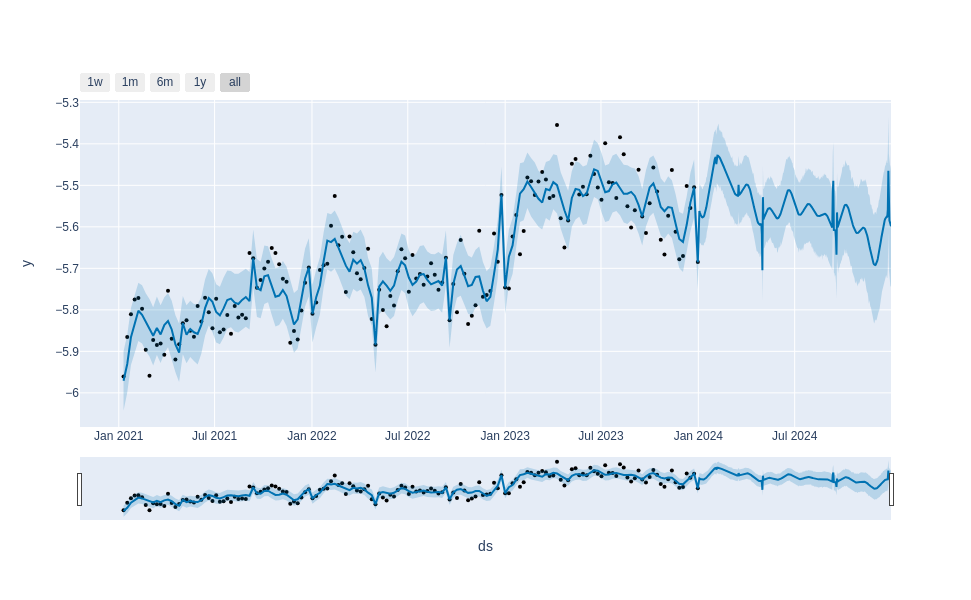

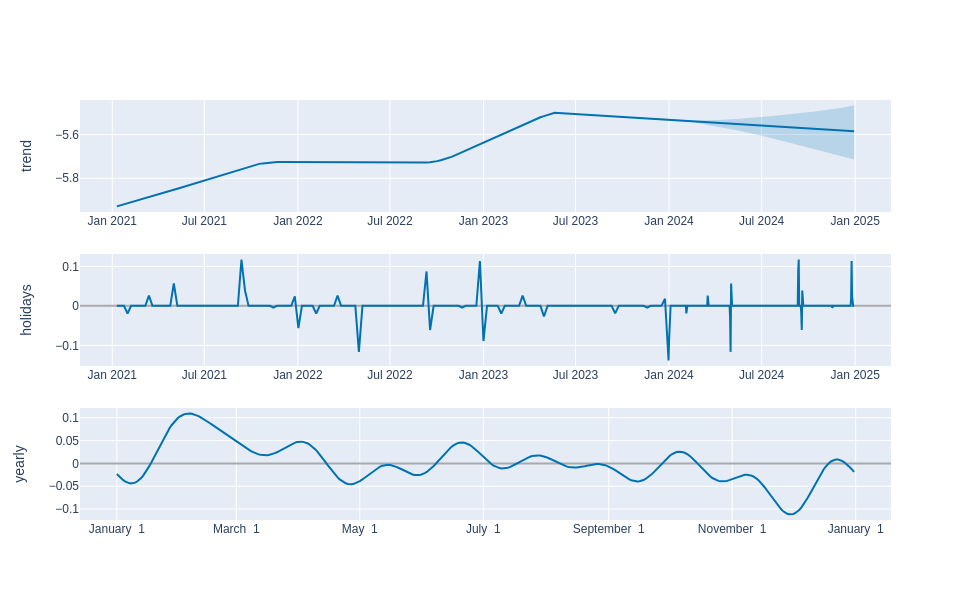

In [ ]:

m = Prophet(holidays=holidays)
# m.add_country_holidays(country_name='MX')


m.fit(tofit)


future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
forecast


plot_plotly(m, forecast).show()
plot_components_plotly(m, forecast).show()

## model

In [ ]:
params_def = {
    'changepoint_prior_scale': {'value':0.05,'range':[0.001,0.5]},
    'seasonality_prior_scale': {'value':1,'range':[-4,1]},   #{'value':10,'range':[0.01,10]}
    'holidays_prior_scale': {'value':10,'range':[0.01,10]},
    'seasonality_mode': {'value':'additive','range':['additive', 'multiplicative']},
    # 'changepoint_range':0.8, #gen(0.8,0.95,q,log=False),
    'yearly_seas':{'value':True,'range':[True, False]},
    'yearly_seasonality_prior_scale': {'value':1,'range':[-4,1]},
    'yearly_fourier_order': {'value':10,'range':[1,10]},
    'monthly_seas':{'value':False,'range':[True, False]},
    'monthly_seasonality_prior_scale': {'value':1,'range':[-4,1]},
    'monthly_fourier_order': {'value':10,'range':[1,10]},
}
put_in_constructor=['changepoint_prior_scale','seasonality_prior_scale','holidays_prior_scale','seasonality_mode']

selected_metric='mape'  #'rmse'

In [ ]:
def model(params,tofit=tofit):
  m = Prophet(**{x: params[x] for x in put_in_constructor},yearly_seasonality=False,holidays=holidays)
  # m.add_country_holidays(country_name='MX')
  if params['yearly_seas']:
    m.add_seasonality(name='yearly', period=365, fourier_order=params['yearly_fourier_order'],prior_scale=params['yearly_seasonality_prior_scale'])
  if params['monthly_seas']:
    m.add_seasonality(name='monthly', period=30.5, fourier_order=params['monthly_fourier_order'],prior_scale=params['monthly_seasonality_prior_scale'])
  m.fit(tofit)
  return m

In [ ]:
class Model:
  def __init__(self,params):
    self.models={}
    for geo in tqdm(geos):
      fitter=df.loc[df['Geographies']==geo]
      self.models[geo]=model(params,tofit=fitter)

  def plot_graphs(self):
    for geo in tqdm(geos):
      future = self.models[geo].make_future_dataframe(periods=365)
      forecast = self.models[geo].predict(future)
      plot_plotly(self.models[geo], forecast).show()

  def cv(self):
    errors=[]
    for geo in tqdm(geos):
      df_cv = cross_validation(self.models[geo], horizon = '180 days')
      df_p = performance_metrics(df_cv)
      errors.append(df_p.mean(numeric_only=True)[selected_metric])
    return np.sum(errors)




# hyper understand

### single time

In [ ]:
start_time = time.time()
m=model({key:value['value'] for key, value in params_def.items()})
finish_time = time.time()
print("--- %s seconds ---" % (finish_time - start_time))

In [ ]:
start_time = time.time()
df_cv = cross_validation(model=m, horizon = '180 days')
df_p = performance_metrics(df_cv)
df_p.mean(numeric_only=True)[selected_metric]
finish_time = time.time()
print("--- %s seconds ---" % (finish_time - start_time))


### multiple geos time

In [ ]:
start_time = time.time()
m=Model({key:value['value'] for key, value in params_def.items()})
finish_time = time.time()
print('')
print("--- %s seconds ---" % (finish_time - start_time))


In [ ]:
start_time = time.time()
m.cv()
finish_time = time.time()
print('')
print("--- %s seconds ---" % (finish_time - start_time))

In [ ]:
# m.plot_graphs()

In [ ]:
Prophet.add_regressor

## dashboard

In [ ]:


import dash_bootstrap_components as dbc
from jupyter_dash import JupyterDash  # pip install dash
# import dash_cytoscape as cyto  # pip install dash-cytoscape==0.2.0 or higher
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Output, Input
import pandas as pd  # pip install pandas
import plotly.express as px
from dash import no_update


In [ ]:



app = JupyterDash(__name__,external_stylesheets=[dbc.themes.BOOTSTRAP])    #, external_stylesheets=external_stylesheets

# df=pd.read_csv('/content/drive/Shareddrives/Team members/Agustin/kruger/9firstanalisis/final_data_2.xlsx')

fields=[]
for key, value in params_def.items():
  if 'fourier' in key:
    result=dcc.Slider(value['range'][0],value['range'][1],1,value=value['value'],id=key,tooltip={"placement": "bottom", "always_visible": True})
  elif 'prior' in key:
    result=dcc.Slider(value['range'][0],value['range'][1],value=value['value'],id=key,tooltip={"placement": "bottom", "always_visible": True})
  else:
    result=dcc.RadioItems([str(j) for j in value['range']], str(value['value']), inline=True,id=key,)
  fields.append(html.H5(key))
  fields.append(result)

app.layout = html.Div([
    dbc.Row([
    dbc.Col(fields, width=3),
    dbc.Col( html.Div(id='graph'),width=9)
    ])



])

@app.callback(Output('graph', 'children'),*[Input(key, 'value') for key in params_def])
def hyper(*hypers):

  params = {
      'changepoint_prior_scale': hypers[0],
      'seasonality_prior_scale': 10**hypers[1],
      'holidays_prior_scale':hypers[2],
      'seasonality_mode':hypers[3],
      # 'changepoint_range':0.8, #gen(0.8,0.95,q,log=False),
      'yearly_seas':hypers[4]=='True',
      'yearly_seasonality_prior_scale': 10**hypers[5],
      'yearly_fourier_order': hypers[6], #[1,5,10],
      'monthly_seas':hypers[7]=='True',
      'monthly_seasonality_prior_scale': 10**hypers[8],
      'monthly_fourier_order': hypers[9],
  }
  m = model(params)
  future = m.make_future_dataframe(periods=365)
  forecast = m.predict(future)
  return [dcc.Graph(figure=plot_plotly(m, forecast)),dcc.Graph(figure=plot_components_plotly(m, forecast))]



app.run_server(port=12385)




# cv

In [ ]:


df_cv = cross_validation(m, horizon = '180 days')  #initial='365 days', period='180 days',
df_cv



In [ ]:
px.line(df_cv,x='ds',y=['y','yhat','yhat_lower',	'yhat_upper'],color='cutoff').show()

In [ ]:

df_p = performance_metrics(df_cv)
# df_p = performance_metrics(df_cv, rolling_window=1)
df_p['horizon']=df_p['horizon'].apply(lambda x: int(str(x).split(' ')[0]))
df_p



In [ ]:
from prophet.plot import plot_cross_validation_metric
px.line(df_p,x='horizon',y=[i for i in df_p.columns if i!='horizon']).show()
fig = plot_cross_validation_metric(df_cv, metric='mape')


# hyperparams

In [ ]:
points=100000
q=10000

def gen(min,max,q,log=False):
  if log:
    return np.exp(np.random.uniform(low=np.log(min), high=np.log(max), size=q))
  else:
    return np.random.uniform(low=min, high=max, size=q)

#constructor hyperparams
param_grid = {
    'changepoint_prior_scale': gen(0.001,0.5,q,log=False),
    'seasonality_prior_scale': gen(0.01,10,q,log=False),
    'holidays_prior_scale':gen(0.01,10,q,log=False),
    'seasonality_mode': ['additive', 'multiplicative'],
    # 'changepoint_range':np.exp(np.random.uniform(low=np.log(0.8), high=np.log(0.95), size=q)),

    'yearly_seas':[True],#[True,False],
    'yearly_seasonality_prior_scale': gen(0.01,10,q,log=False),
    'yearly_fourier_order': [1,2,3,4,5,6,7,8,9,10],
    'monthly_seas':[True,False],
    'monthly_seasonality_prior_scale': gen(0.01,10,q,log=False),
    'monthly_fourier_order': [1,2,3], #[1,2,3,4,5,6,7,8,9,10],
}
put_in_constructor=['changepoint_prior_scale','seasonality_prior_scale','holidays_prior_scale','seasonality_mode']



# Generate all combinations of parameters
# all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
all_params =[{key:np.random.choice(value) for key, value in param_grid.items()} for _ in range(points)]

all_params

In [ ]:
# only continuous vars
# points=100000
# q=10000

# def gen(min,max,q,log=False):
#   if log:
#     return np.exp(np.random.uniform(low=np.log(min), high=np.log(max), size=q))
#   else:
#     return np.random.uniform(low=min, high=max, size=q)

# #constructor hyperparams
# param_grid = {
#     'changepoint_prior_scale': gen(0.001,0.5,q,log=False),
#     'seasonality_prior_scale': gen(0.01,10,q,log=False),
#     'holidays_prior_scale':gen(0.01,10,q,log=False),
#     'seasonality_mode':['additive'], #['additive', 'multiplicative'],
#     # 'changepoint_range':np.exp(np.random.uniform(low=np.log(0.8), high=np.log(0.95), size=q)),

#     'yearly_seas':[True],#[True,False],
#     'yearly_seasonality_prior_scale': gen(0.01,10,q,log=False),
#     'yearly_fourier_order': [5], #[1,2,3,4,5,6,7,8,9,10],
#     'monthly_seas':[True],#[True,False],
#     'monthly_seasonality_prior_scale': gen(0.01,10,q,log=False),
#     'monthly_fourier_order': [2], #[1,2,3,4,5,6,7,8,9,10],
# }
# put_in_constructor=['changepoint_prior_scale','seasonality_prior_scale','holidays_prior_scale','seasonality_mode']


# # Generate all combinations of parameters
# # all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
# all_params =[{key:np.random.choice(value) for key, value in param_grid.items()} for _ in range(points)]

# all_params

In [ ]:
# q=10000

# def gen(min,max,q,log=False):
#   if log:
#     return np.exp(np.random.uniform(low=np.log(min), high=np.log(max), size=q))
#   else:
#     return np.random.uniform(low=min, high=max, size=q)

# #constructor hyperparams
# param_grid = {
#     'changepoint_prior_scale': gen(0.001,0.5,q,log=False),
#     'seasonality_prior_scale': gen(0.01,10,q,log=False),
#     'holidays_prior_scale':gen(0.01,10,q,log=False),
#     'seasonality_mode':['additive', 'multiplicative'],
#     # 'changepoint_range':np.exp(np.random.uniform(low=np.log(0.8), high=np.log(0.95), size=q)),

#     'yearly_seas':[True,False],
#     'yearly_seasonality_prior_scale': gen(0.01,10,q,log=False),
#     'yearly_fourier_order': [1,2,3,4,5,6,7,8,9,10],
#     'monthly_seas':[True,False],
#     'monthly_seasonality_prior_scale': gen(0.01,10,q,log=False),
#     'monthly_fourier_order': [1,2,3,4,5,6,7,8,9,10],
# }
# put_in_constructor=['changepoint_prior_scale','seasonality_prior_scale','holidays_prior_scale','seasonality_mode']


# # Generate all combinations of parameters
# # all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
# all_params =[{key:np.random.choice(value) for key, value in param_grid.items()} for _ in range(100000)]

# all_params

## no multiprocess

In [ ]:
# %%capture

start_time = time.time()

errors = []  # Store the RMSEs for each params here
errors2=[]

# Use cross validation to evaluate all parameters
for params in tqdm(all_params):
    m = model(params)
    # m = Prophet(**{x: params[x] for x in put_in_constructor})
    # m.add_country_holidays(country_name='MX')
    # if params['yearly_seas']:
    #   m.add_seasonality(name='yearly', period=365, fourier_order=params['yearly_fourier_order'],prior_scale=params['yearly_seasonality_prior_scale'])
    # if params['monthly_seas']:
    #   m.add_seasonality(name='monthly', period=30.5, fourier_order=params['monthly_fourier_order'],prior_scale=params['monthly_seasonality_prior_scale'])


    # m.fit(tofit)  # Fit model with given params
    df_cv = cross_validation(m, horizon = '180 days')
    df_p = performance_metrics(df_cv)
    errors.append(df_p.mean(numeric_only=True)[selected_metric])

    df_p = performance_metrics(df_cv,rolling_window=1)
    errors2.append(df_p[selected_metric].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results[selected_metric] = errors
tuning_results[selected_metric+'_2'] = errors2
tuning_results=tuning_results.sort_values(selected_metric)

finish_time = time.time()


In [ ]:
print("--- %s seconds ---" % (finish_time - start_time))
tuning_results

## classic mutiprocess

In [ ]:
start_time = time.time()
selected_metric='mape'  #'rmse'
errors = []  # Store the RMSEs for each params here
errors2=[]

# Use cross validation to evaluate all parameters
for params in tqdm(all_params):
    m = model(params)
    # m = Prophet(**{x: params[x] for x in put_in_constructor})
    # m.add_country_holidays(country_name='MX')
    # if params['yearly_seas']:
    #   m.add_seasonality(name='yearly', period=365, fourier_order=params['yearly_fourier_order'],prior_scale=params['yearly_seasonality_prior_scale'])
    # if params['monthly_seas']:
    #   m.add_seasonality(name='monthly', period=30.5, fourier_order=params['monthly_fourier_order'],prior_scale=params['monthly_seasonality_prior_scale'])


    # m.fit(tofit)  # Fit model with given params
    df_cv = cross_validation(m, horizon = '180 days', parallel="processes")
    df_p = performance_metrics(df_cv)
    errors.append(df_p.mean(numeric_only=True)[selected_metric])


    df_p = performance_metrics(df_cv,rolling_window=1)
    errors2.append(df_p[selected_metric].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results[selected_metric] = errors
tuning_results[selected_metric+'_2'] = errors2
tuning_results=tuning_results.sort_values(selected_metric)


finish_time = time.time()

In [ ]:
print("--- %s seconds ---" % (time.time() - start_time))
tuning_results

## new multiprocess

In [ ]:

cpu_count()

In [ ]:
def cv_model(params):
  m = model(params)
  # m = Prophet(**{x: params[x] for x in put_in_constructor},yearly_seasonality=False)
  # m.add_country_holidays(country_name='MX')
  # if params['yearly_seas']:
  #   m.add_seasonality(name='yearly', period=365, fourier_order=params['yearly_fourier_order'],prior_scale=params['yearly_seasonality_prior_scale'])
  # if params['monthly_seas']:
  #   m.add_seasonality(name='monthly', period=30.5, fourier_order=params['monthly_fourier_order'],prior_scale=params['monthly_seasonality_prior_scale'])


  # m.fit(tofit)  # Fit model with given params
  df_cv = cross_validation(m, horizon = '180 days')
  df_p = performance_metrics(df_cv)
  # df_p = performance_metrics(df_cv,rolling_window=1)

  return df_p.mean(numeric_only=True)[selected_metric] ,df_p[selected_metric].values[-1]

cv_model(all_params[0])

In [ ]:
%%capture
start_time = time.time()
p = Pool(cpu_count())
errores = list(tqdm(p.imap(cv_model, all_params), total=len(all_params)))
p.close()
p.join()

finish_time = time.time()

In [ ]:
print("--- %s seconds ---" % (finish_time - start_time))
errores

In [ ]:
tuning_results = pd.DataFrame(all_params)
tuning_results[selected_metric] = [i[0] for i in errores]
tuning_results[selected_metric+'_2'] = [i[1] for i in errores]
tuning_results=tuning_results.sort_values(selected_metric)
var2='yearly_seasonality_prior_scale'
var='changepoint_prior_scale'
# tuning_results['changepoint_prior_scale']=tuning_results['changepoint_prior_scale'].apply(lambda x: str(x))
px.scatter(tuning_results.sort_values(var),x=var,y='mape',color=var2).show()
px.scatter_3d(tuning_results.sort_values(var),x=var,y=var2,z='mape').show()
tuning_results

In [ ]:
tuning_results.to_csv('tuning_results_full_allparams.csv',index=False)


## results

In [ ]:
best_params = all_params[np.argmin(errors)]
m = Prophet(**{x: best_params[x] for x in put_in_constructor})
if best_params['yearly_seas']:
  m.add_seasonality(name='yearly', period=365, fourier_order=best_params['yearly_fourier_order'],prior_scale=best_params['yearly_seasonality_prior_scale'])
if best_params['monthly_seas']:
  m.add_seasonality(name='monthly', period=30.5, fourier_order=best_params['monthly_fourier_order'],prior_scale=best_params['monthly_seasonality_prior_scale'])


m.fit(tofit)  # Fit model with given best_params




future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
fig=plot_plotly(m, forecast)
fig.show()

In [ ]:


all_figs=[]
for descending_params in tuning_results.to_dict('records')[:10]:

  m = Prophet(**{x: descending_params[x] for x in put_in_constructor})
  if descending_params['yearly_seas']:
    m.add_seasonality(name='yearly', period=365, fourier_order=descending_params['yearly_fourier_order'],prior_scale=descending_params['yearly_seasonality_prior_scale'])
  if descending_params['monthly_seas']:
    m.add_seasonality(name='monthly', period=30.5, fourier_order=descending_params['monthly_fourier_order'],prior_scale=descending_params['monthly_seasonality_prior_scale'])


  m.fit(tofit)  # Fit model with given descending_params




  future = m.make_future_dataframe(periods=365)
  forecast = m.predict(future)
  f=plot_plotly(m, forecast)
  # fig.add_trace()
  # fig.add_trace(f.data)
  f.show()
  f2=plot_components_plotly(m, forecast)
  f2.show()
  print(descending_params[selected_metric])
  display(descending_params)




  # all_figs.append(go.Frame(data=f.data,layout=f.layout))
# fig.show()

In [ ]:
tuning_results.to_csv('/content/drive/Shareddrives/Team members/Agustin/ideas/prophet/tuning_results.csv',index=False)


## hyper understanding

In [ ]:
selected_metric='mape'  #'rmse'

In [ ]:
tuning_results=pd.read_csv('/content/drive/Shareddrives/Team members/Agustin/ideas/prophet/tuning_results.csv')
tuning_results

In [ ]:
px.scatter(tuning_results,x='monthly_seas',y=selected_metric).show()

In [ ]:

px.histogram(tuning_results,x='mape').show()

In [ ]:
selected_tuned=tuning_results[tuning_results['mape']<0.03]
selected_tuned=selected_tuned[selected_tuned['yearly_seas']==True]
selected_tuned['seasonality_mode']=selected_tuned['seasonality_mode'].apply(lambda x: 1 if x=='additive' else 0)
selected_tuned=selected_tuned.drop('yearly_seas',axis=1)
selected_tuned=selected_tuned.drop('monthly_seas',axis=1)

selected_tuned



In [ ]:
for i in selected_tuned.columns[:-2]:
  px.histogram(selected_tuned,x=i).show()

In [ ]:
for i in tuning_results.columns[:-2]:
  px.scatter(tuning_results,x=i,y=selected_metric).show()

In [ ]:
for i in selected_tuned.columns[:-2]:
  px.scatter(selected_tuned,x=i,y=selected_metric,log_y=True).show()

In [ ]:

from sklearn.decomposition import PCA

pca=pd.DataFrame(PCA(n_components=3).fit_transform(selected_tuned[selected_tuned.columns[:-2]]))
pca['error']=selected_tuned['mape'].tolist()
px.scatter(pca,x=0,y=1,color='error').show()
px.scatter_3d(pca,x=0,y=1,z=2,color='error').show()
pca

# derivability

## check

In [ ]:
q=10000

def gen(min,max,q,log=False):
  if log:
    return np.exp(np.random.uniform(low=np.log(min), high=np.log(max), size=q))
  else:
    return np.random.uniform(low=min, high=max, size=q)

#constructor hyperparams
param_grid = {
    'changepoint_prior_scale': gen(0.001,0.5,q,log=False),
    'seasonality_prior_scale': [10], #gen(0.01,10,q,log=False),
    'holidays_prior_scale':[10], #gen(0.01,10,q,log=False),
    'seasonality_mode':['additive'], #['additive', 'multiplicative'],
    # 'changepoint_range':np.exp(np.random.uniform(low=np.log(0.8), high=np.log(0.95), size=q)),

    'yearly_seas':[True], #[True,False],
    'yearly_seasonality_prior_scale': gen(0.01,10,q,log=False),
    'yearly_fourier_order': [7], #[1,2,3,4,5,6,7,8,9,10],
    'monthly_seas':[False], #[True,False],
    'monthly_seasonality_prior_scale': gen(0.01,10,q,log=False),
    'monthly_fourier_order': [1,2,3,4,5,6,7,8,9,10],
}
put_in_constructor=['changepoint_prior_scale','seasonality_prior_scale','holidays_prior_scale','seasonality_mode']


# Generate all combinations of parameters
# all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
all_params =[{key:np.random.choice(value) for key, value in param_grid.items()} for _ in range(100000)]

all_params

In [ ]:
# # %%capture

# start_time = time.time()
# selected_metric='mape'  #'rmse'
# errors = []  # Store the RMSEs for each params here
# errors2=[]

# # Use cross validation to evaluate all parameters
# for params in tqdm(all_params):
#     m = model(params)
#     # m = Prophet(**{x: params[x] for x in put_in_constructor})
#     # m.add_country_holidays(country_name='MX')
#     # if params['yearly_seas']:
#     #   m.add_seasonality(name='yearly', period=365, fourier_order=params['yearly_fourier_order'],prior_scale=params['yearly_seasonality_prior_scale'])
#     # if params['monthly_seas']:
#     #   m.add_seasonality(name='monthly', period=30.5, fourier_order=params['monthly_fourier_order'],prior_scale=params['monthly_seasonality_prior_scale'])


#     # m.fit(tofit)  # Fit model with given params
#     df_cv = cross_validation(m, horizon = '180 days')
#     df_p = performance_metrics(df_cv)
#     errors.append(df_p.mean(numeric_only=True)[selected_metric])

#     df_p = performance_metrics(df_cv,rolling_window=1)
#     errors2.append(df_p[selected_metric].values[0])

# # Find the best parameters
# tuning_results = pd.DataFrame(all_params)
# tuning_results[selected_metric] = errors
# tuning_results[selected_metric+'_2'] = errors2
# tuning_results=tuning_results.sort_values(selected_metric)

# finish_time = time.time()


In [ ]:
def cv_model(params):
  m = model(params)

  df_cv = cross_validation(m, horizon = '180 days')
  df_p = performance_metrics(df_cv)
  # df_p = performance_metrics(df_cv,rolling_window=1)

  return df_p.mean(numeric_only=True)[selected_metric] ,df_p[selected_metric].values[-1]

cv_model(params)

In [ ]:
%%capture
start_time = time.time()
p = Pool(cpu_count())
errores = list(tqdm(p.imap(cv_model, all_params), total=len(all_params)))
p.close()
p.join()

finish_time = time.time()

In [ ]:
print("--- %s seconds ---" % (finish_time - start_time))


In [ ]:
tuning_results = pd.DataFrame(all_params)
tuning_results[selected_metric] = [i[0] for i in errores]
tuning_results[selected_metric+'_2'] = [i[1] for i in errores]
tuning_results=tuning_results.sort_values(selected_metric)
var2='yearly_seasonality_prior_scale'
var='changepoint_prior_scale'
# tuning_results['changepoint_prior_scale']=tuning_results['changepoint_prior_scale'].apply(lambda x: str(x))
px.scatter(tuning_results.sort_values(var),x=var,y='mape',color=var2).show()
px.scatter_3d(tuning_results.sort_values(var),x=var,y=var2,z='mape').show()
tuning_results

In [ ]:
# tuning_results.to_csv('tuning_results_der_check.csv',index=False)


## gradient descent

In [ ]:
numberofpoints=100
dx=0.01
lr=1
steps=1000

In [ ]:
q=10000

def gen(min,max,q,log=False):
  if log:
    return np.exp(np.random.uniform(low=np.log(min), high=np.log(max), size=q))
  else:
    return np.random.uniform(low=min, high=max, size=q)

#constructor hyperparams
param_grid = {
    'changepoint_prior_scale': gen(0.001,0.5,q,log=False),
    'seasonality_prior_scale': gen(0.01,10,q,log=False),
    'holidays_prior_scale':gen(0.01,10,q,log=False),
    'seasonality_mode':['additive'],#['additive', 'multiplicative'],
    # 'changepoint_range':np.exp(np.random.uniform(low=np.log(0.8), high=np.log(0.95), size=q)),

    'yearly_seas':[True], #[True,False],
    'yearly_seasonality_prior_scale': gen(0.01,10,q,log=False),
    'yearly_fourier_order': [5], #[1,2,3,4,5,6,7,8,9,10],
    'monthly_seas':[True], #[True,False],
    'monthly_seasonality_prior_scale': gen(0.01,10,q,log=False),
    'monthly_fourier_order': [2],# [1,2,3,4,5,6,7,8,9,10],
}
put_in_constructor=['changepoint_prior_scale','seasonality_prior_scale','holidays_prior_scale','seasonality_mode']


# Generate all combinations of parameters
# all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
all_params =[{key:np.random.choice(value) for key, value in param_grid.items()} for _ in range(numberofpoints)]

all_params

In [ ]:
#0.01
# params={'changepoint_prior_scale': 0.4042924598868849,
#   'seasonality_prior_scale': 8.711439966251662,
#   'holidays_prior_scale': 6.025993608393734,
#   'seasonality_mode': 'additive',
#   'yearly_seas': True,
#   'yearly_seasonality_prior_scale': 7.614171239394231,
#   'yearly_fourier_order': 5,
#   'monthly_seas': True,
#   'monthly_seasonality_prior_scale': 0.7815524122527571,
#   'monthly_fourier_order': 2}

diff_list=['changepoint_prior_scale','holidays_prior_scale','yearly_seasonality_prior_scale','monthly_seasonality_prior_scale']


In [ ]:
def cv_model(params):
  m = model(params)

  df_cv = cross_validation(m, horizon = '180 days')
  df_p = performance_metrics(df_cv)
  # df_p = performance_metrics(df_cv,rolling_window=1)

  return df_p.mean(numeric_only=True)[selected_metric] ,df_p[selected_metric].values[-1]
# def next_params(params):

#   val_error=cv_model(params)[0]
#   dy={}
#   x={i:np.log(params[i]) for i in diff_list}
#   # params_aux=params
#   for i in diff_list:
#     # print(i)
#     params1=params.copy()
#     new_representation=x[i]+dx #np.log10(params1[i])+dx
#     params1[i]=np.exp(new_representation)#10**new_representation
#     dy[i]=(cv_model(params1)[0]-val_error)
#     # print(params1[i])


#   for i in diff_list:
#     params[i]=max(params[i]-lr*((dy[i]/dx)*np.exp(-x[i])),0.000001)
#   return val_error,params,dy

def next_params(params):

  val_error=cv_model(params)[0]
  dy={}
  x={i:np.log(params[i]) for i in diff_list}
  # params_aux=params
  for i in diff_list:
    # print(i)
    params1=params.copy()
    new_representation=x[i]+dx #np.log10(params1[i])+dx
    params1[i]=np.exp(new_representation)#10**new_representation
    dy[i]=(cv_model(params1)[0]-val_error)
    # print(params1[i])


  for i in diff_list:
    x[i]=x[i]-lr*(dy[i]/dx)
    params[i]=np.exp(x[i]) #max(params[i]-lr*((dy[i]/dx)*np.exp(-x[i])),0)
  return val_error,params,dy

In [ ]:
#1 iter 30 segs

def params_sgd(params):


  errors=[]
  pars=[]
  # dys=[]
  for i in tqdm(range(steps)):

    val_error,params,dy=next_params(params)

    errors.append(val_error)
    pars.append(params.copy())
    # dys.append(dy.copy())
  return errors, pars



In [ ]:
numberofpoints=100
dx=0.01
lr=1
steps=100
params=all_params[0]


start_time = time.time()

errors, pars=params_sgd(params)

finish_time = time.time()
print("--- %s seconds ---" % (finish_time - start_time))



In [ ]:
px.line(errors)

In [ ]:
numberofpoints=100
dx=0.01
lr=1
steps=1000
params=all_params[0]


start_time = time.time()

errors, pars=params_sgd(params)

finish_time = time.time()
print("--- %s seconds ---" % (finish_time - start_time))



In [ ]:
px.line(errors)

In [ ]:
%%capture
start_time = time.time()
p = Pool(cpu_count())
trainings = list(tqdm(p.imap(params_sgd, all_params), total=len(all_params)))
p.close()
p.join()

finish_time = time.time()

In [ ]:


with open('trainings3.pkl', 'wb') as outp:

    pickle.dump(trainings, outp, pickle.HIGHEST_PROTOCOL)

In [ ]:
print("--- %s seconds ---" % (finish_time - start_time))


In [ ]:
# tuning_results = pd.DataFrame(all_params)
# tuning_results[selected_metric] = [i[0] for i in errores]
# tuning_results[selected_metric+'_2'] = [i[1] for i in errores]
# tuning_results=tuning_results.sort_values(selected_metric)
# var2='yearly_seasonality_prior_scale'
# var='changepoint_prior_scale'
# # tuning_results['changepoint_prior_scale']=tuning_results['changepoint_prior_scale'].apply(lambda x: str(x))
# px.scatter(tuning_results.sort_values(var),x=var,y='mape',color=var2).show()
# px.scatter_3d(tuning_results.sort_values(var),x=var,y=var2,z='mape').show()
# tuning_results

In [ ]:
# tuning_results.to_csv('tuning_results_der_check.csv',index=False)


# kernel suggested search

In [ ]:
numberofpoints=100
steps=1000
supa=2

In [ ]:
q=10000

def gen(min,max,q,log=False):
  if log:
    return np.exp(np.random.uniform(low=np.log(min), high=np.log(max), size=q))
  else:
    return np.random.uniform(low=min, high=max, size=q)

#constructor hyperparams
param_grid = {
    'changepoint_prior_scale': gen(0.001,0.5,q,log=False),
    'seasonality_prior_scale': gen(0.01,10,q,log=False),
    'holidays_prior_scale':gen(0.01,10,q,log=False),
    'seasonality_mode': ['additive', 'multiplicative'],
    # 'changepoint_range':np.exp(np.random.uniform(low=np.log(0.8), high=np.log(0.95), size=q)),

    'yearly_seas':[True],#[True,False],
    'yearly_seasonality_prior_scale': gen(0.01,10,q,log=False),
    'yearly_fourier_order': [1,2,3,4,5,6,7,8,9,10],
    'monthly_seas':[True,False],
    'monthly_seasonality_prior_scale': gen(0.01,10,q,log=False),
    'monthly_fourier_order': [1,2,3], #[1,2,3,4,5,6,7,8,9,10],
}
put_in_constructor=['changepoint_prior_scale','seasonality_prior_scale','holidays_prior_scale','seasonality_mode']


# Generate all combinations of parameters
# all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
all_params =[{key:np.random.choice(value) for key, value in param_grid.items()} for _ in range(numberofpoints)]

all_params

[{'changepoint_prior_scale': 0.3296866567105473,
  'seasonality_prior_scale': 4.741046638651166,
  'holidays_prior_scale': 8.229518832415247,
  'seasonality_mode': 'additive',
  'yearly_seas': True,
  'yearly_seasonality_prior_scale': 8.391804812488237,
  'yearly_fourier_order': 10,
  'monthly_seas': True,
  'monthly_seasonality_prior_scale': 6.922637759043419,
  'monthly_fourier_order': 1},
 {'changepoint_prior_scale': 0.19668012085255382,
  'seasonality_prior_scale': 7.504714429371197,
  'holidays_prior_scale': 7.97132414564841,
  'seasonality_mode': 'multiplicative',
  'yearly_seas': True,
  'yearly_seasonality_prior_scale': 2.3619380790464017,
  'yearly_fourier_order': 9,
  'monthly_seas': False,
  'monthly_seasonality_prior_scale': 7.843446068538792,
  'monthly_fourier_order': 1},
 {'changepoint_prior_scale': 0.1604994509481768,
  'seasonality_prior_scale': 2.537320258670552,
  'holidays_prior_scale': 9.084889496427424,
  'seasonality_mode': 'multiplicative',
  'yearly_seas': True

In [ ]:
def cv_model(params):
  m = model(params)

  df_cv = cross_validation(m, horizon = '180 days')
  df_p = performance_metrics(df_cv)
  # df_p = performance_metrics(df_cv,rolling_window=1)

  return df_p.mean(numeric_only=True)[selected_metric] ,df_p[selected_metric].values[-1]

In [ ]:
# %%capture
# start_time = time.time()
# p = Pool(cpu_count())
# errores = list(tqdm(p.imap(cv_model, all_params), total=len(all_params)))
# p.close()
# p.join()

# finish_time = time.time()



In [ ]:
# print("--- %s seconds ---" % (finish_time - start_time))



In [ ]:
vars=['changepoint_prior_scale', 'seasonality_prior_scale',
      'holidays_prior_scale', 'seasonality_mode',
      'yearly_seasonality_prior_scale', 'yearly_fourier_order',
      'monthly_seas', 'monthly_seasonality_prior_scale',
      'monthly_fourier_order',]  # 'yearly_seas',
counter=0

def get_trainings(all_params,errores,graphs=False):
  trainings=pd.DataFrame(all_params).assign(error=[i[0] for i in errores],iteration=counter)
  if graphs:
    px.histogram(trainings,x='changepoint_prior_scale',nbins=100).show()
    px.scatter(trainings,x='changepoint_prior_scale',y='yearly_seasonality_prior_scale').show()
  return trainings

def get_representation(trainings,graphs=False):
  trainings['weight']=trainings['error']/trainings['error'].mean()
  trainings['weight']=1/(trainings['weight']**supa)
  if graphs:
    px.histogram(trainings,x='weight').show()

  rep=trainings.copy()
  for i in rep.columns:
    if 'prior_scale' in i:
      rep[i]=np.log(rep[i])

  rep['seasonality_mode']=rep['seasonality_mode'].apply(lambda x: 1 if x=='additive' else 0)
  rep['yearly_seas']=rep['yearly_seas'].apply(lambda x: 1 if x==True else 0)
  rep['monthly_seas']=rep['monthly_seas'].apply(lambda x: 1 if x==True else 0)

  return rep

def get_suggestions(rep,graphs=False):

  kernel = stats.gaussian_kde(rep[vars].T.to_numpy()+np.random.normal(loc=0.0, scale=0.001, size=rep[vars].T.to_numpy().shape),weights=rep['weight'].to_numpy())
  suggestions=kernel.resample(numberofpoints)
  new_searchs=pd.DataFrame({i:suggestions[index] for index, i in enumerate(vars)})

  for i in new_searchs.columns:
    if 'prior_scale' in i:
      new_searchs[i]=np.exp(new_searchs[i])

  new_searchs['seasonality_mode']=new_searchs['seasonality_mode'].apply(lambda x: 'additive' if x==1 else 'multiplicative')
  new_searchs['yearly_seas']=True #new_searchs['yearly_seas'].apply(lambda x: True if x==1 else False)
  new_searchs['monthly_seas']=new_searchs['monthly_seas'].apply(lambda x: True if x==1 else False)


  new_searchs=new_searchs.loc[new_searchs['changepoint_prior_scale']<0.5]
  for i in new_searchs.columns:
    if '_seasonality_' in i:
      new_searchs=new_searchs.loc[new_searchs[i]<10]
    elif 'fourier' in i:
      new_searchs[i]=new_searchs[i].apply(lambda x: round(x))
      new_searchs=new_searchs.loc[new_searchs[i]>0]

  if graphs:
    px.scatter(pd.concat([new_searchs.assign(compare='new'),trainings[vars].assign(compare='old')]),x='changepoint_prior_scale',y='yearly_seasonality_prior_scale',color='compare').show()

  return new_searchs

In [ ]:
# %%capture
# start_time = time.time()

# all_trainings=pd.DataFrame()
# counter=0
# for _ in tqdm(range(steps)):

#   p = Pool(cpu_count())
#   errores = list(tqdm(p.imap(cv_model, all_params), total=len(all_params)))
#   p.close()
#   p.join()

#   trainings=get_trainings(all_params,errores)
#   all_trainings=pd.concat([all_trainings,trainings])
#   rep=get_representation(all_trainings)
#   suggestions=get_suggestions(rep)
#   all_params=suggestions.to_dict('records')
#   counter+=1

# finish_time = time.time()

In [ ]:
%%capture
start_time = time.time()

p = Pool(cpu_count())
all_trainings=pd.DataFrame()
counter=0
for _ in tqdm(range(steps)):
  # errores = list(tqdm(p.imap_unordered(cv_model, all_params), total=len(all_params)))
  errores = p.map(cv_model, all_params)
  trainings=get_trainings(all_params,errores)
  all_trainings=pd.concat([all_trainings,trainings])

  #guardoo
  all_trainings.to_csv('suggestions_training.csv')
  with open(f'time_keep{(time.time() - start_time)}.pkl', 'wb') as outp:

    pickle.dump((time.time() - start_time), outp, pickle.HIGHEST_PROTOCOL)



  rep=get_representation(all_trainings)
  suggestions=get_suggestions(rep)
  all_params=suggestions.to_dict('records')
  counter+=1

p.close()
p.join()
finish_time = time.time()

In [ ]:
all_trainings.to_csv('suggestions_training.csv')
print("--- %s seconds ---" % (finish_time - start_time))
px.scatter(all_trainings,x='iteration',y='error').show()
px.scatter(all_trainings.groupby('iteration',as_index=False).mean(numeric_only=True),x='iteration',y='error').show()

# MLFlow

In [ ]:
import mlflow
# mlflow.set_tracking_uri("./content/drive/Shareddrives/Team members/Agustin/ideas/prophet")


In [ ]:

params_def = {
    'changepoint_prior_scale': {'value':0.05,'range':[0.001,0.5]},
    'seasonality_prior_scale': {'value':1,'range':[-4,1]},   #{'value':10,'range':[0.01,10]}
    'holidays_prior_scale': {'value':10,'range':[0.01,10]},
    'seasonality_mode': {'value':'additive','range':['additive', 'multiplicative']},
    # 'changepoint_range':0.8, #gen(0.8,0.95,q,log=False),
    'yearly_seas':{'value':True,'range':[True, False]},
    'yearly_seasonality_prior_scale': {'value':1,'range':[-4,1]},
    'yearly_fourier_order': {'value':10,'range':[1,10]},
    'monthly_seas':{'value':False,'range':[True, False]},
    'monthly_seasonality_prior_scale': {'value':1,'range':[-4,1]},
    'monthly_fourier_order': {'value':10,'range':[1,10]},
}
params={key:value['value'] for key, value in params_def.items()}
with mlflow.start_run():
  mlflow.log_params(params)

In [ ]:
import shutil
shutil.move("/content/mlruns", "/content/drive/Shareddrives/Team members/Agustin/ideas/prophet/")

# add variable